In [1]:
import tensorflow as tf
import numpy as np
import gym

In [2]:
#tf.config.run_functions_eagerly(False)

In [2]:
import pyvirtualdisplay

In [4]:
display = pyvirtualdisplay.Display(visible=0, size=(1400, 900))
display.start()

In [2]:
env = gym.make('CartPole-v0')
env.reset()

array([0.04325246, 0.0483912 , 0.03049769, 0.0138689 ], dtype=float32)

In [6]:
import PIL.Image

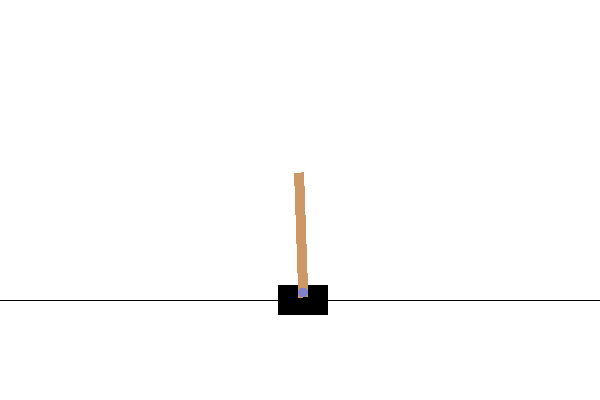

In [10]:
PIL.Image.fromarray(env.render(mode='rgb_array'))

## Gym env params

In [3]:
state_shape = env.observation_space.shape[0]
state_shape

4

In [4]:
action_shape = env.action_space.n
action_shape

2

## Actor critic import

In [5]:
from actor_critic_tf import actor_critic as ac

In [6]:
act = ac.ActorCritic(alpha=0.001,beta=0.001,gamma=0.99,state_dim=state_shape,action_dim=action_shape,num_of_layers=2)

2022-01-21 00:08:44.013423: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: UNKNOWN ERROR (100)
2022-01-21 00:08:44.013476: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (MSI): /proc/driver/nvidia/version does not exist
2022-01-21 00:08:44.013696: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/mnt/c/Users/hockg/Documents/tensorflow_env/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


## Build policy and critic network

## Params

In [10]:
num_episode = 100
num_steps = 200
gamma = 0.90

## Training

In [12]:
for i in range(num_episode):
    done = False
    Rewards = 0
    state = env.reset()
    current_value = 0.0
    for j in range(num_steps):
        action = act.choose_choose_action(state)
        next_state,reward,done,info = env.step(action)
        Rewards += reward 
        act.learn(state,action,reward,next_state,done)
        if done or j == num_steps - 1:
            print(f'episode:{i} , Avg reward: {Rewards/j}, Cumulative rewards: {Rewards}')
        if done:
            break
        state = next_state

episode:0 , Avg reward: 1.0909090909090908, Cumulative rewards: 12.0
episode:1 , Avg reward: 1.04, Cumulative rewards: 26.0
episode:2 , Avg reward: 1.1111111111111112, Cumulative rewards: 10.0
episode:3 , Avg reward: 1.0714285714285714, Cumulative rewards: 15.0
episode:4 , Avg reward: 1.0833333333333333, Cumulative rewards: 13.0
episode:5 , Avg reward: 1.0555555555555556, Cumulative rewards: 19.0
episode:6 , Avg reward: 1.0769230769230769, Cumulative rewards: 14.0
episode:7 , Avg reward: 1.1111111111111112, Cumulative rewards: 10.0
episode:8 , Avg reward: 1.0833333333333333, Cumulative rewards: 13.0
episode:9 , Avg reward: 1.0909090909090908, Cumulative rewards: 12.0
episode:10 , Avg reward: 1.0666666666666667, Cumulative rewards: 16.0
episode:11 , Avg reward: 1.0833333333333333, Cumulative rewards: 13.0
episode:12 , Avg reward: 1.125, Cumulative rewards: 9.0
episode:13 , Avg reward: 1.1, Cumulative rewards: 11.0
episode:14 , Avg reward: 1.1111111111111112, Cumulative rewards: 10.0
epi